# **Mental Healt Dataset**

# Step 1: Load the Data
from "https://openpsychometrics.org/_rawdata/" and the test called "DASS_data_21.02.19.zip" (2017-2018)





In [148]:
#import pandas library
import pandas as pd
#data loading from the github
url = "https://raw.githubusercontent.com/vrelvape/individual-project-mental-health/refs/heads/main/data/data.csv"
raw_df= pd.read_csv(url, sep="\t", engine="python")#format the csv to read it correctly

Display the raw dataset from the set to have a first look

In [149]:
#display the dimension of the dataframe
print(raw_df.shape)
#display the first 5rows of the Dataframe
raw_df.head()

(39775, 172)


,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


Display the list of all the columns in the dataframe

In [150]:
#raw_df.columns.tolist()

# Step 2: Clean the Raw Dataframe

## 1) Create all the informations for the DASS-42 questions

In [151]:
#create a list of DASS-42 columns
dass_items= [f"Q{i}A" for i in range(1,42)]
#print(dass_items) #remove the print to show the list

#mapping of codes, we want to reassign the questions(shortened) to their code
questions_labels= {
    "Q1A": "Upset by trivial things",
    "Q2A": "Dryness of mouth",
    "Q3A": "No positive feelings",
    "Q4A": "Breathing difficulty",
    "Q5A": "Lack of motivation",
    "Q6A": "Over-reacting",
    "Q7A": "Shakiness",
    "Q8A": "Difficulty relaxing",
    "Q9A": "Anxious in situations",
    "Q10A": "Nothing to look forward to",
    "Q11A": "Easily upset",
    "Q12A": "Using nervous energy",
    "Q13A": "Sad and depressed",
    "Q14A": "Impatient when delayed",
    "Q15A": "Faintness",
    "Q16A": "Lost interest in everything",
    "Q17A": "Low self-worth",
    "Q18A": "Touchy",
    "Q19A": "Unexplained sweating",
    "Q20A": "Scared without reason",
    "Q21A": "Life not worthwhile",
    "Q22A": "Hard to wind down",
    "Q23A": "Difficulty swallowing",
    "Q24A": "No enjoyment",
    "Q25A": "Heart awareness",
    "Q26A": "Down-hearted",
    "Q27A": "Very irritable",
    "Q28A": "Close to panic",
    "Q29A": "Hard to calm down",
    "Q30A": "Fear trivial tasks",
    "Q31A": "No enthusiasm",
    "Q32A": "Irritated by interruptions",
    "Q33A": "Nervous tension",
    "Q34A": "Worthless",
    "Q35A": "Intolerant of delays",
    "Q36A": "Terrified",
    "Q37A": "Hopeless future",
    "Q38A": "Life meaningless",
    "Q39A": "Agitated",
    "Q40A": "Fear panic situations",
    "Q41A": "Trembling",
    "Q42A": "No initiative"
}


These 42 items are divided into 3 subscales (Depression/Anxiety/Stress) (14 items each), as defined in the reference scientific literature:

>Lovibond, S. H., & Lovibond, P. F. (1995). Manual for the Depression Anxiety Stress Scales. Psychology Foundation of Australia




In [152]:
depression_columns = ['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A', 'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A']
anxiety_columns= ['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'Q23A', 'Q25A', 'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A']
stress_columns= ['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A', 'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A']

Now we move on to the calculation of DASS scores per individual

In [153]:
#sum the responses for each subscale and create new column for each
raw_df['dassdepression']= raw_df[depression_columns].sum(axis=1)
raw_df['dassanxiety']= raw_df[anxiety_columns].sum(axis=1)
raw_df['dassstress']= raw_df[stress_columns].sum(axis=1)
#total score per individual and create new column
raw_df['dasssum']= raw_df[['dassdepression', 'dassanxiety', 'dassstress']].sum(axis=1)

#create a list with the 4 news columns
targets= ["dassanxiety", "dassstress", "dassdepression", "dasssum"]




## 2) Clean the interesting demographics columns

2.1 **Gender** column

In [154]:
#Create a dictionary mapping codes to labels
gender_map = {
    1: "Male",
    2: "Female",
    3: "Other",
    0: "No response"
}
#apply this mapping to the "gender" column to create a new column "gender_clean"
raw_df["gender_clean"] = raw_df["gender"].map(gender_map)

2.2 **Education** column

In [155]:
#Create a dictionary mapping codes to labels
education_map = {
    1: "Less than high school",
    2: "High school",
    3: "University degree",
    4: "Graduate degree",
    0: "No response"
}
#apply this mapping to the "education" column to create a new column "education_clean"
raw_df["education_clean"] = raw_df["education"].map(education_map)

 2.3 **Urban** column

In [156]:
#Create a dictionary mapping codes to labels
urban_map = {
    1: "Rural",
    2: "Suburban",
    3: "Urban",
    0: "No response"
}
#apply this mapping to the "urban" column to create a new column "urban_clean"
raw_df["urban_clean"] = raw_df["urban"].map(urban_map)

2.4 **Religion** column

In [157]:
#Create a dictionary mapping codes to labels
religion_map = {
    1: "Agnostic",
    2: "Atheist",
    3: "Buddhist",
    4: "Christian (Catholic)",
    5: "Christian (Mormon)",
    6: "Christian (Protestant)",
    7: "Christian (Other)",
    8: "Hindu",
    9: "Jewish",
    10: "Muslim",
    11: "Sikh",
    12: "Other",
    0: "No response"
}
#apply this mapping to the "religion" column to create a new column "religion_clean"
raw_df["religion_clean"] = raw_df["religion"].map(religion_map)

2.5 **Orientation** column

In [158]:
#Create a dictionary mapping codes to labels
orientation_map = {
    1: "Heterosexual",
    2: "Bisexual",
    3: "Homosexual",
    4: "Asexual",
    5: "Other",
    0: "No response"
}
#apply this mapping to the "orientation" column to create a new column "orientation_clean"
raw_df["orientation_clean"] = raw_df["orientation"].map(orientation_map)

2.6 **Race** column

In [159]:
#Create a dictionary mapping codes to labels
race_map = {
    10: "Asian",
    20: "Arab",
    30: "Black",
    40: "Indigenous Australian",
    50: "Native American",
    60: "White",
    70: "Other",
    0: "No response"
}
#apply this mapping to the "race" column to create a new column "race_clean"
raw_df["race_clean"] = raw_df["race"].map(race_map)

2.7 **Hand** column

In [160]:
#Create a dictionary mapping codes to labels
hand_map = {
    1: "Right",
    2: "Left",
    3: "Ambidextrous",
    0: "No response"
}
#apply this mapping to the "hand" column to create a new column "hand_clean"
raw_df["hand_clean"] = raw_df["hand"].map(hand_map)

2.8 **Voted** column

In [161]:
#Create a dictionary mapping codes to labels
voted_map = {
    1: "Yes",
    2: "No",
    0: "No response"
}
#apply this mapping to the "voted" column to create a new column "voted_clean"
raw_df["voted_clean"] = raw_df["voted"].map(voted_map)

2.8 **Married** column

In [162]:
#Create a dictionary mapping codes to labels
married_map = {
    1: "Never married",
    2: "Currently married",
    3: "Previously married",
    0: "No response"
}
#apply this mapping to the "married" column to create a new column "married_clean"
raw_df["married_clean"] = raw_df["married"].map(married_map)

2.9 **Native** English column

In [163]:
#Create a dictionary mapping codes to labels
engnat_map = {
    1: "Yes",
    2: "No",
    0: "No response"
}
#apply this mapping to the "engnat" column to create a new column "engnat_clean"
raw_df["engnat_clean"] = raw_df["engnat"].map(engnat_map)

2.10 **Screensize** column

In [164]:
#Create a dictionary mapping codes to labels
screen_map = {
    1: "Small screen",
    2: "Large screen",
    0: "No response"
}
#apply this mapping to the "screensize" column to create a new column "screensize_clean"
raw_df["screensize_clean"] = raw_df["screensize"].map(screen_map)

2.11 **Uniquenetwork** column

In [165]:
#Create a dictionary mapping codes to labels
netloc_map = {
    1: "Unique",
    2: "Shared",
    0: "No response"
}
#apply this mapping to the "uniquenetworklocation" column to create a new column "uniquenetworklocation_clean"
raw_df["uniquenetworklocation_clean"] = raw_df["uniquenetworklocation"].map(netloc_map)

2.12 **Source** column

In [166]:
#Create a dictionary mapping codes to labels
source_map = {
    1: "Front page of the site hosting the survey",
    2: "Google",
    3: "Other or Unknown",
    0: "No response"
}
#apply this mapping to the "source" column to create a new column "source_clean"
raw_df["source_clean"] = raw_df["source"].map(netloc_map)

2.13 **Age**

For the column age we need to use another way of cleaning as the values are given input by the users.


In [167]:
#use .describe() to see the distribution of the colum age
raw_df["age"].describe()

,age
count,39775.000000
mean,23.612168
std,21.581722
min,13.000000
25%,18.000000
50%,21.000000
75%,25.000000
max,1998.000000


As we can see there are strange values, that we need to clean.

In [168]:
#need to import the library datetime
import datetime
#We need to have the currently year to calculate the age of the people who put their birthday year and not their age
current_year = datetime.datetime.now().year
#create a new column with only ages, if the value is a year it will transforme it as an age
raw_df["age_clean"] = raw_df["age"].apply(lambda x: current_year - x if 1900 <= x <= (current_year - 10) else x)
#we need to eliminate every age that would be aberrant we will chose to say that everything that is lower than 10 and bigger than 100 is aberrant
raw_df = raw_df[(raw_df["age_clean"] >= 10) & (raw_df["age_clean"] <= 100)]

2.14 **Country**

Country needs a special treatment too for the cleaning.

In [169]:
#install required library for country
!pip install pycountry
#import pycountry library
import pycountry

#now we need to convert the ISO Apha-2 country codes to their full names, the original dataset contains two-letter ISO codes that we need to cneed to convert to their full names
#this function looks up the full country name corresponding to the code
def iso_to_country_name(iso_code):
  try:
    return pycountry.countries.get(alpha_2=iso_code).name
  except:
    return None

#create a new column with the country names
raw_df["country_name"]= raw_df["country"].apply(iso_to_country_name)

2.15 **Continent**

Continent works pretty much the same way as the colum country.

In [170]:
#install required library for continent
!pip install pycountry-convert
#import pycountry library
import pycountry_convert as pc_convert

#this function retrieve the country ISO alpha 2 code and convert it to a continent code and it translate that code to the full continent name
def get_continent(country_name):
  try:
      country_code = pycountry.countries.get(name=country_name).alpha_2
      continent_code = pc_convert.country_alpha2_to_continent_code(country_code)
      continent_name = pc_convert.convert_continent_code_to_continent_name(continent_code)
      return continent_name
  except:
      return "Unknown"
#create a new column with the continent names
raw_df["continent"]= raw_df["country_name"].apply(get_continent)

2. Now we want to create a list of all the news demographics columns that we clean/create or want to use

In [171]:
demographics=["gender_clean","education_clean","urban_clean","religion_clean","orientation_clean","race_clean","hand_clean","voted_clean","married_clean","engnat_clean","screensize_clean","uniquenetworklocation_clean","source_clean","age_clean","country_name","continent","familysize"]

## 3) Create all the informations for the TIPI(Big Five Personality)

Ten Item Personality Inventory(TIPI) is a very brief psychological measure designed to assess the five major personality traits known by the acronym OCEAN:
* Openness to Experience
* Conscientiousness
* Extraversion
* Agreeableness
* Neuroticism

TIPI consists of 10 items, rated on a scale from 1(strongly disagree) to 7(strongly agree). Each trait is calculated by averaging 2 items:



* one directly measured item
* one item to be reverse-coded (recoding is done using the formula: 8-value)






In [172]:
#create a list with TIPI items
tipi_items = [f"TIPI{i}" for i in range(1, 11)]
#mapping of codes, we want to reassign the traits(shortened) to their code
traits_labels= {
    "TIPI1": "Extraverted",
    "TIPI2": "Critical",
    "TIPI3": "Dependable",
    "TIPI4": "Anxious",
    "TIPI5": "Open to new experiences",
    "TIPI6": "Reserved",
    "TIPI7": "Sympathic",
    "TIPI8": "Disorganized",
    "TIPI9": "Calm",
    "TIPI10": "Conventional"
}

We therefore calculate here the five personality dimensions following the instructions from the source artice:

>Gosling, Rentfrow, & Swann (2003) – A Very Brief Measure of the Big-Five Personality Domains.



In [173]:

#the items 2,4,6,8,10 are reverse-scored, so we apply the formula
raw_df["TIPI_R2"]=8-raw_df["TIPI2"]
raw_df["TIPI_R4"]=8-raw_df["TIPI4"]
raw_df["TIPI_R6"]=8-raw_df["TIPI6"]
raw_df["TIPI_R8"]=8-raw_df["TIPI8"]
raw_df["TIPI_R10"]=8-raw_df["TIPI10"]
#we compute the five personality traits
raw_df["Extraversion"]=(raw_df["TIPI1"]+raw_df["TIPI_R6"])/2
raw_df["Agreeableness"]=(raw_df["TIPI7"]+raw_df["TIPI_R2"])/2
raw_df["Conscientiousness"]=(raw_df["TIPI3"]+raw_df["TIPI_R8"])/2
raw_df["Emotional Stability"]=(raw_df["TIPI_R4"]+raw_df["TIPI9"])/2
raw_df["Openness"]=(raw_df["TIPI5"]+raw_df["TIPI_R10"])/2


In [174]:
#display the distribution of one's traits OCEAN
raw_df["Extraversion"].describe()

,Extraversion
count,39772.000000
mean,3.467226
std,1.555119
min,0.500000
25%,2.000000
50%,3.500000
75%,4.500000
max,7.500000


As we can see the values are not beteween 1 and 7.
Theoretically, the responses to TIPI items are on a scale from so the final scores should fall within this range. However, each personality trait is calculated as the average of two items. In some cases one of the two items may be missing(empty or NaN), wich causes pandas to return the value of the other item alone as the score.




In [175]:
#create a list with the traits
tipi_traits = ["Extraversion", "Agreeableness", "Conscientiousness", "Emotional Stability", "Openness"]
#delete the rows with the values biger than 7 and lower than 1
for score in tipi_traits:
    raw_df = raw_df[(raw_df[score] >= 1) & (raw_df[score] <= 7)]

## 4) Create all the informations for the Vocabulary Check List(VCL)

In this test they put fake words as traps to check the attention/validity of the user.

The fakes words are: VCL6, VCL9, VCL12

In [176]:
#create a list of VCL columns
vcl_items= [f"VCL{i}" for i in range(1,17)]
#mapping of codes, we want to reassign the traits(shortened) to their code
vcl_labels= {
    "VCL1": "boat",
    "VCL2": "incoherent",
    "VCL3": "pallid",
    "VCL4": "robot",
    "VCL5": "audible",
    "VCL6": "cuivocal",
    "VCL7": "paucity",
    "VCL8": "epistemology",
    "VCL9": "florted",
    "VCL10": "decide",
    "VCL11": "pastiche",
    "VCL12": "verdid",
    "VCL13": "abysmal",
    "VCL14": "lucid",
    "VCL15": "betray",
    "VCL16": "funny"
}

#list with the fake words
fake_words= ["VCL6", "VCL9", "VCL12"]
#create a colum with the total VCL score () (1=checked, 0=unchecked)
raw_df["vcl_score"]= raw_df[[item for item in vcl_items if item not in fake_words]].sum(axis=1)
#create a colum with the number of fake words checked by the user
raw_df["vcl_invalid"]= raw_df[fake_words].sum(axis=1)
#create a column named "valid", wich is boolean column,True= checked 0 fake words, False= otherwise
raw_df["vcl_valid"]= raw_df["vcl_invalid"] == 0
#createa list with the new vcl columns
vcl_new_columns=["vcl_valid","vcl_invalid","vcl_score"]

## 5) Check if there are any NaN values in the raw dataframe

In [177]:
#display the numbers of missing values for each column
missing_values=raw_df.isnull().sum()
#print it
print("Number of missing values per column:")
print(missing_values[missing_values > 0])

Number of missing values per column:
country             2
major           11347
country_name      539
dtype: int64


as we can see Major column as a lot of missing values 11'347 wich represent **29% of the dataframe**, if we decided to delete every row that countain a missing value for Major we would lose way to many data, so we need to delete the full column to conserve the maximum data

In [178]:
#delete columns with more that 20% of missing values
limit = 0.20
raw_df.dropna(axis=1, thresh=int((1 - limit) * len(raw_df)), inplace=True)

Now we can proceed to eliminate the Nan rows in the column country and country_name

In [179]:
#delete the rows with with missing values
raw_df.dropna(inplace=True)

## 6) Finaly create a clean Dataframe that will be used for the analysis part

In [180]:
#define wich column are important to keep
cols_to_keep =dass_items+tipi_items+vcl_items+ demographics+targets+tipi_traits+vcl_new_columns
#select the columns
clean_df = raw_df[cols_to_keep].copy()
#rename the columns only in the new clean dataframe
clean_df.rename(columns=questions_labels, inplace=True)
clean_df.rename(columns=traits_labels, inplace=True)
clean_df.rename(columns=vcl_labels, inplace=True)

In [181]:
clean_df

,Upset by trivial things,Dryness of mouth,No positive feelings,Breathing difficulty,Lack of motivation,Over-reacting,Shakiness,Difficulty relaxing,Anxious in situations,Nothing to look forward to,...,dassdepression,dasssum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness,vcl_valid,vcl_invalid,vcl_score
0,4,4,2,4,4,4,4,4,2,1,...,41,143,1.0,5.0,5.0,1.0,7.0,True,0,8
1,4,1,2,3,4,4,3,4,3,2,...,38,110,5.0,5.0,2.5,1.0,4.0,True,0,8
2,3,1,4,1,4,3,1,3,2,4,...,53,110,2.0,4.0,2.5,4.5,5.5,True,0,7
3,2,3,2,1,3,3,4,2,3,3,...,30,91,2.5,6.5,7.0,5.0,6.5,True,0,7
4,2,2,3,4,4,2,4,4,4,3,...,46,143,2.5,4.0,2.5,2.5,5.0,True,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,1,3,2,3,2,1,3,1,4,...,50,105,2.5,5.5,4.0,3.0,4.0,True,0,9
39771,3,4,3,4,3,4,4,4,3,4,...,52,148,3.0,3.5,3.0,2.5,4.0,False,1,8
39772,2,1,2,1,1,1,1,1,2,1,...,18,52,5.5,4.0,7.0,4.0,5.0,True,0,6
39773,3,1,2,2,3,3,3,4,3,1,...,30,104,2.0,2.5,4.0,2.0,3.5,True,0,11


Display the list of all the columns in the clean dataframe

In [182]:
#clean_df.columns.tolist()

Now we want to create a Dataframe that we can rely on it, so for that we will use only the rows with a vcl_valid of true

In [183]:
#create the new datasaet with only true values for vcl_valid
clean_valid_df = clean_df[clean_df["vcl_valid"] == True].copy()

In [184]:
clean_valid_df

,Upset by trivial things,Dryness of mouth,No positive feelings,Breathing difficulty,Lack of motivation,Over-reacting,Shakiness,Difficulty relaxing,Anxious in situations,Nothing to look forward to,...,dassdepression,dasssum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness,vcl_valid,vcl_invalid,vcl_score
0,4,4,2,4,4,4,4,4,2,1,...,41,143,1.0,5.0,5.0,1.0,7.0,True,0,8
1,4,1,2,3,4,4,3,4,3,2,...,38,110,5.0,5.0,2.5,1.0,4.0,True,0,8
2,3,1,4,1,4,3,1,3,2,4,...,53,110,2.0,4.0,2.5,4.5,5.5,True,0,7
3,2,3,2,1,3,3,4,2,3,3,...,30,91,2.5,6.5,7.0,5.0,6.5,True,0,7
4,2,2,3,4,4,2,4,4,4,3,...,46,143,2.5,4.0,2.5,2.5,5.0,True,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,3,4,2,2,2,4,4,2,1,3,...,29,108,5.5,4.0,5.0,4.0,3.5,True,0,9
39770,2,1,3,2,3,2,1,3,1,4,...,50,105,2.5,5.5,4.0,3.0,4.0,True,0,9
39772,2,1,2,1,1,1,1,1,2,1,...,18,52,5.5,4.0,7.0,4.0,5.0,True,0,6
39773,3,1,2,2,3,3,3,4,3,1,...,30,104,2.0,2.5,4.0,2.0,3.5,True,0,11


 We want to check if there are any doubles, wich we should delete for for better data

In [185]:
# Verify if there are any duplicated rows
print(f"Number of duplicated rows:{clean_valid_df.duplicated().sum()}")

Number of duplicated rows:0


We now observe the type for every columns, to transform them in the best types possible for the analysis

In [186]:
#display the types for every columns in the clean valid dataframe
clean_valid_df.dtypes

,0
Upset by trivial things,int64
Dryness of mouth,int64
No positive feelings,int64
Breathing difficulty,int64
Lack of motivation,int64
Over-reacting,int64
Shakiness,int64
Difficulty relaxing,int64
Anxious in situations,int64
Nothing to look forward to,int64


There are some columns with the type **"Object"**, The best way to transform these columns for the analysis format is to transform them in **"Category"** type.

In [187]:
category_columns = [column for column in clean_valid_df.columns if clean_valid_df[column].dtype == "object"]
for column in category_columns:
    clean_valid_df[column] = clean_valid_df[column].astype("category")


Now we want to create a Dataframe that is shorter because the other one is a bit to big to use it for analysis (96 columns)

In [188]:
#define wich column are important to keep
cols_to_keep_v2 =demographics+targets+tipi_traits+vcl_new_columns
#select the columns
analysis_df=clean_valid_df[cols_to_keep_v2].copy()

In [189]:
analysis_df

,gender_clean,education_clean,urban_clean,religion_clean,orientation_clean,race_clean,hand_clean,voted_clean,married_clean,engnat_clean,...,dassdepression,dasssum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness,vcl_valid,vcl_invalid,vcl_score
0,Female,High school,Urban,Other,Heterosexual,Asian,Right,No,Never married,No,...,41,143,1.0,5.0,5.0,1.0,7.0,True,0,8
1,Female,High school,Urban,Christian (Other),No response,Other,Left,No,Never married,Yes,...,38,110,5.0,5.0,2.5,1.0,4.0,True,0,8
2,Female,High school,Urban,Christian (Catholic),Homosexual,White,Right,Yes,Never married,No,...,53,110,2.0,4.0,2.5,4.5,5.5,True,0,7
3,Female,Less than high school,Urban,Christian (Catholic),Other,Other,Left,No,Never married,Yes,...,30,91,2.5,6.5,7.0,5.0,6.5,True,0,7
4,Female,University degree,Suburban,Muslim,Heterosexual,Asian,Ambidextrous,No,Never married,No,...,46,143,2.5,4.0,2.5,2.5,5.0,True,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,Female,Less than high school,Suburban,Agnostic,Heterosexual,Other,Right,No,Never married,Yes,...,29,108,5.5,4.0,5.0,4.0,3.5,True,0,9
39770,Male,High school,Suburban,Atheist,Asexual,White,Right,No,Never married,Yes,...,50,105,2.5,5.5,4.0,3.0,4.0,True,0,9
39772,Female,University degree,Suburban,Christian (Other),Heterosexual,Black,Right,Yes,Currently married,Yes,...,18,52,5.5,4.0,7.0,4.0,5.0,True,0,6
39773,Female,University degree,Suburban,Christian (Protestant),Heterosexual,White,Right,Yes,Never married,Yes,...,30,104,2.0,2.5,4.0,2.0,3.5,True,0,11


In [190]:
analysis_df.columns.tolist()

['gender_clean',
 'education_clean',
 'urban_clean',
 'religion_clean',
 'orientation_clean',
 'race_clean',
 'hand_clean',
 'voted_clean',
 'married_clean',
 'engnat_clean',
 'screensize_clean',
 'uniquenetworklocation_clean',
 'source_clean',
 'age_clean',
 'country_name',
 'continent',
 'familysize',
 'dassanxiety',
 'dassstress',
 'dassdepression',
 'dasssum',
 'Extraversion',
 'Agreeableness',
 'Conscientiousness',
 'Emotional Stability',
 'Openness',
 'vcl_valid',
 'vcl_invalid',
 'vcl_score']

Since the scoring scales vary depending on the type of data (DASS, TIPI, etc.), we will standardize them to allow for comparison between them. And so we create the final dataframe used for the analysis called "analysis_standardized_df".

In [191]:
#import the library
from sklearn.preprocessing import StandardScaler

#create the list of the columns that we want to standardized
list_columns_to_standardize = ["age_clean", "familysize", "dassanxiety", "dassstress", "dassdepression", "dasssum", "Extraversion", "Agreeableness", "Conscientiousness", "Emotional Stability", "Openness", "vcl_score"]

#create the new analysis_standardized_df Dataframe
analysis_standardized_df = analysis_df.copy()

#standardize the list of the columns chosen
scaler = StandardScaler()
analysis_standardized_df[[column + '_std' for column in list_columns_to_standardize]] = scaler.fit_transform(
    analysis_standardized_df[list_columns_to_standardize]
)


In [192]:
analysis_standardized_df

,gender_clean,education_clean,urban_clean,religion_clean,orientation_clean,race_clean,hand_clean,voted_clean,married_clean,engnat_clean,...,dassanxiety_std,dassstress_std,dassdepression_std,dasssum_std,Extraversion_std,Agreeableness_std,Conscientiousness_std,Emotional Stability_std,Openness_std,vcl_score_std
0,Female,High school,Urban,Other,Heterosexual,Asian,Right,No,Never married,No,...,1.800504,1.822440,0.501098,1.456674,-1.612546,0.372626,0.530901,-1.482194,1.854944,0.495170
1,Female,High school,Urban,Christian (Other),No response,Other,Left,No,Never married,Yes,...,0.113333,0.575709,0.255645,0.345727,0.994242,0.372626,-1.162936,-1.482194,-0.421159,0.495170
2,Female,High school,Urban,Christian (Catholic),Homosexual,White,Right,Yes,Never married,No,...,-0.382893,-0.383315,1.482910,0.345727,-0.960849,-0.454784,-1.162936,0.837316,0.716893,0.131346
3,Female,Less than high school,Urban,Christian (Catholic),Other,Other,Left,No,Never married,Yes,...,0.113333,-0.479218,-0.398896,-0.293910,-0.635000,1.613742,1.885970,1.168675,1.475594,0.131346
4,Female,University degree,Suburban,Muslim,Heterosexual,Asian,Ambidextrous,No,Never married,No,...,2.395976,0.767514,0.910186,1.456674,-0.635000,-0.454784,-1.162936,-0.488118,0.337542,1.222820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,Female,Less than high school,Suburban,Agnostic,Heterosexual,Other,Right,No,Never married,Yes,...,0.510315,0.863416,-0.480713,0.278396,1.320091,-0.454784,0.530901,0.505958,-0.800509,0.858995
39770,Male,High school,Suburban,Atheist,Asexual,White,Right,No,Never married,Yes,...,-0.382893,-0.575120,1.237457,0.177401,-0.635000,0.786331,-0.146634,-0.156760,-0.421159,0.858995
39772,Female,University degree,Suburban,Christian (Other),Heterosexual,Black,Right,Yes,Currently married,Yes,...,-1.474592,-1.534145,-1.380707,-1.606847,1.320091,-0.454784,1.885970,0.505958,0.337542,-0.232479
39773,Female,University degree,Suburban,Christian (Protestant),Heterosexual,White,Right,Yes,Never married,Yes,...,-0.283648,1.151123,-0.398896,0.143736,-0.960849,-1.695899,-0.146634,-0.819477,-0.800509,1.586644


We save these two Dataframes in a csv format:

*   clean_valid_df
*   analysis_standardized_df



In [193]:
#save the two Dataframes in a csv format
clean_valid_df.to_csv("clean_valid_df.csv", index=False)
analysis_standardized_df.to_csv("analysis_df.csv", index=False)

We are finished now with the cleaning part and we can move on to the analysis part

# Step: 2 Descriptive exploration of anxiety

In [194]:
#display Descriptive statistics of the anxiety score 'dassanxiety
print("Descriptive statistics of the anxiety score 'dassanxiety':")
print(analysis_standardized_df["dassanxiety"].describe())

print("")

#display the simple distribution of the anxiexty score
print("Distribution of anxiety scores unique values:")
print(analysis_standardized_df["dassanxiety"].value_counts().sort_index())


Descriptive statistics of the anxiety score 'dassanxiety':
count    33899.000000
mean        29.858049
std         10.076191
min         14.000000
25%         22.000000
50%         29.000000
75%         37.000000
max         56.000000
Name: dassanxiety, dtype: float64

Distribution of anxiety scores unique values:
dassanxiety
14     746
15     793
16     940
17    1129
18    1138
19    1112
20    1204
21    1247
22    1236
23    1187
24    1265
25    1227
26    1230
27    1253
28    1161
29    1116
30    1129
31    1034
32    1007
33     969
34     973
35     940
36     983
37     839
38     840
39     774
40     709
41     656
42     650
43     576
44     535
45     473
46     458
47     379
48     363
49     308
50     282
51     237
52     198
53     187
54     135
55     114
56     167
Name: count, dtype: int64


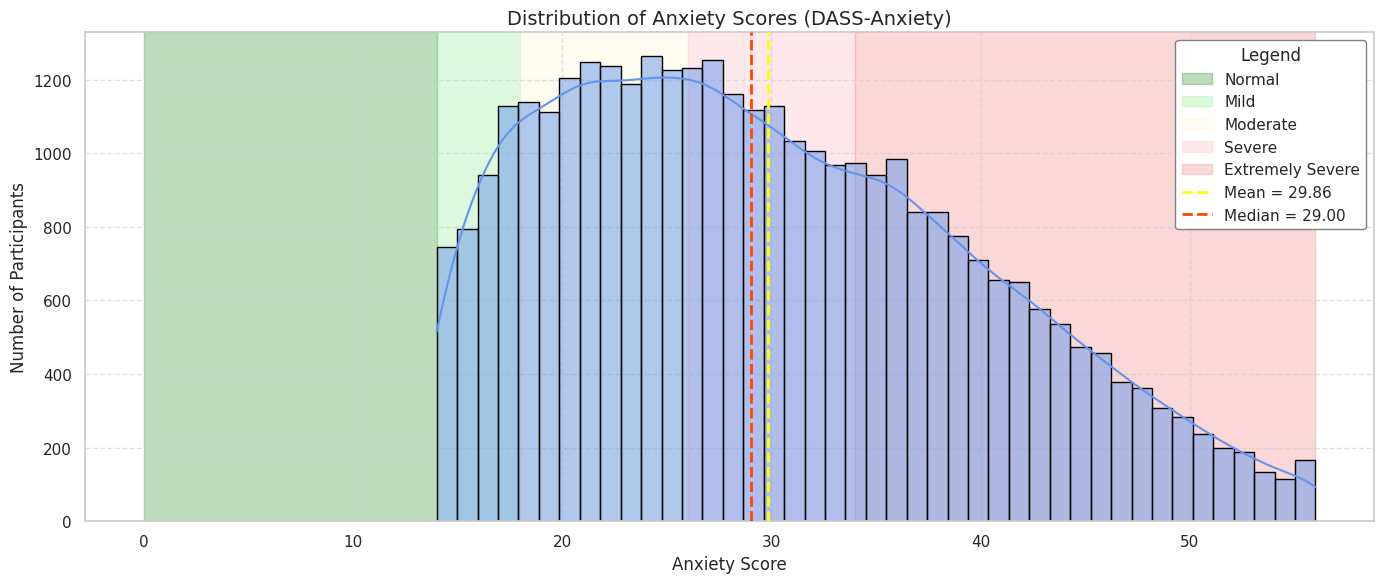

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Prepare figure
fig, ax = plt.subplots(figsize=(14, 6))

# Extract data
anxiety_scores = analysis_standardized_df["dassanxiety"]

# Compute statistics
mean_val = anxiety_scores.mean()
median_val = anxiety_scores.median()

# Define continuous severity ranges
severity_ranges = [
    (0, 14, 'forestgreen', 'Normal'),
    (14, 18, 'lightgreen', 'Mild'),
    (18, 26, 'lemonchiffon', 'Moderate'),
    (26, 34, 'lightpink', 'Severe'),
    (34, 56, 'lightcoral', 'Extremely Severe')
]

# Draw background bands first (zorder low)
for start, end, color, label in severity_ranges:
    ax.axvspan(start, end, color=color, alpha=0.3, label=label, zorder=0)

# Histogram and KDE on top
sns.histplot(anxiety_scores, bins=43, kde=True, color="cornflowerblue", edgecolor="black", ax=ax, zorder=2)

# Mean and Median lines
ax.axvline(mean_val, color='yellow', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.2f}', zorder=3)
ax.axvline(median_val, color="orangered", linestyle='--', linewidth=2, label=f'Median = {median_val:.2f}', zorder=3)

# Titles and labels
ax.set_title("Distribution of Anxiety Scores (DASS-Anxiety)", fontsize=14)
ax.set_xlabel("Anxiety Score", fontsize=12)
ax.set_ylabel("Number of Participants", fontsize=12)

# Clean and readable legend
legend = ax.legend(loc="upper right", title="Legend", facecolor='white', framealpha=1)
legend.get_frame().set_edgecolor('gray')

# Grid
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


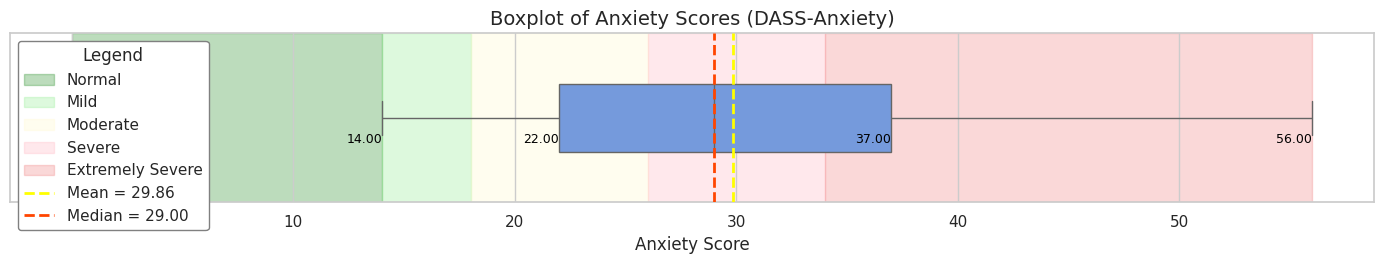

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Set style
sns.set(style="whitegrid")

# Prepare figure
fig, ax = plt.subplots(figsize=(14, 2.8))

# Extract data
anxiety_scores = analysis_standardized_df["dassanxiety"]

# Compute stats
mean_val = anxiety_scores.mean()
median_val = anxiety_scores.median()
q1 = anxiety_scores.quantile(0.25)
q3 = anxiety_scores.quantile(0.75)
min_val = anxiety_scores.min()
max_val = anxiety_scores.max()

# Severity zones
severity_ranges = [
    (0, 14, 'forestgreen', 'Normal'),
    (14, 18, 'lightgreen', 'Mild'),
    (18, 26, 'lemonchiffon', 'Moderate'),
    (26, 34, 'lightpink', 'Severe'),
    (34, 56, 'lightcoral', 'Extremely Severe')
]

# Draw background bands
for start, end, color, label in severity_ranges:
    ax.axvspan(start, end, color=color, alpha=0.3, zorder=0)

# Plot boxplot WITHOUT the mean dot
sns.boxplot(
    x=anxiety_scores,
    ax=ax,
    color="cornflowerblue",
    width=0.4,
    showmeans=False,
    zorder=2
)

# Mean & Median lines
ax.axvline(mean_val, color='yellow', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.2f}', zorder=3)
ax.axvline(median_val, color="orangered", linestyle='--', linewidth=2, label=f'Median = {median_val:.2f}', zorder=3)

# Annotate values
for val in [min_val, q1, q3, max_val]:
    ax.text(val, 0.15, f'{val:.2f}', ha='right', va='baseline', fontsize=9, color='black', zorder=4)

# Legend
handles = [
    mpatches.Patch(color='forestgreen', alpha=0.3, label='Normal'),
    mpatches.Patch(color='lightgreen', alpha=0.3, label='Mild'),
    mpatches.Patch(color='lemonchiffon', alpha=0.3, label='Moderate'),
    mpatches.Patch(color='lightpink', alpha=0.3, label='Severe'),
    mpatches.Patch(color='lightcoral', alpha=0.3, label='Extremely Severe'),
    plt.Line2D([], [], color='yellow', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.2f}'),
    plt.Line2D([], [], color='orangered', linestyle='--', linewidth=2, label=f'Median = {median_val:.2f}')
]

legend = ax.legend(handles=handles, loc="upper left", title="Legend", facecolor='white', framealpha=1)
legend.get_frame().set_edgecolor('gray')

# Final touches
ax.set_title("Boxplot of Anxiety Scores (DASS-Anxiety)", fontsize=14)
ax.set_xlabel("Anxiety Score", fontsize=12)
ax.set_yticks([])

plt.tight_layout()
plt.show()


groupe gender

In [197]:
import pandas as pd

gender_filtered_df = analysis_standardized_df[~analysis_standardized_df["gender_clean"].isin(["No response"])].copy()
#future worning
if isinstance(gender_filtered_df["gender_clean"].dtype, pd.CategoricalDtype):
    gender_filtered_df["gender_clean"] = gender_filtered_df["gender_clean"].cat.remove_unused_categories()


mean_std_by_gender = gender_filtered_df.groupby("gender_clean", observed=True)["dassanxiety"].agg(['mean', 'std', 'count']).round(2)
display(mean_std_by_gender)


,mean,std,count
gender_clean,,,
Female,30.51,10.07,26170
Male,27.25,9.60,7236
Other,34.14,10.58,435


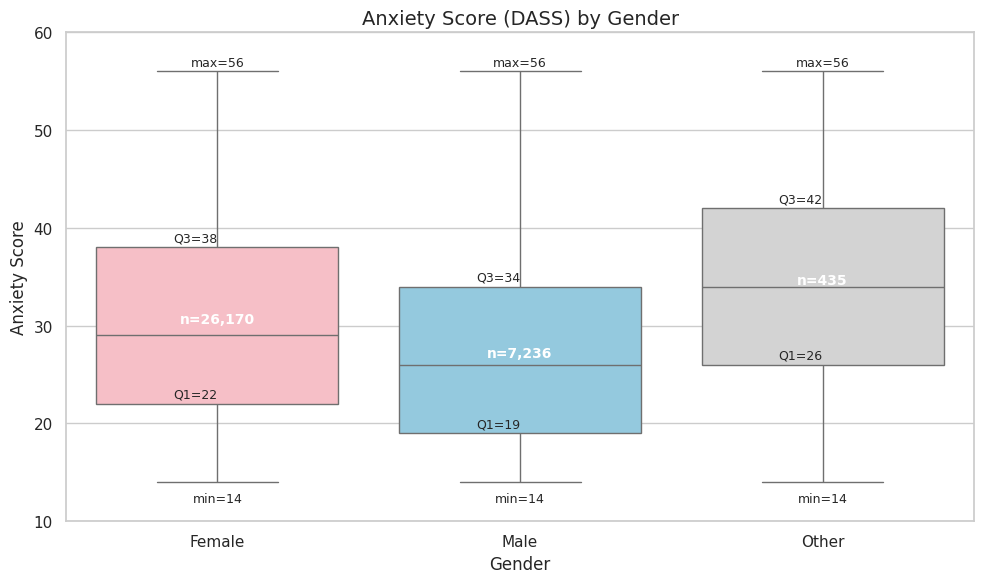

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt


remaining_genders = gender_filtered_df["gender_clean"].unique()
palette = {gender: color for gender, color in zip(remaining_genders, ["lightpink", "skyblue", "lightgray"])}


group_counts = gender_filtered_df["gender_clean"].value_counts()


plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="gender_clean",
    y="dassanxiety",
    data=gender_filtered_df,
    palette=palette,
    hue="gender_clean",  #FutureWarning
    legend=False,
    showmeans=False
)
ax.set_ylim(10, 60)

for i, gender in enumerate(remaining_genders):
    scores = gender_filtered_df[gender_filtered_df["gender_clean"] == gender]["dassanxiety"]
    min_val = scores.min()
    q1 = scores.quantile(0.25)
    q3 = scores.quantile(0.75)
    max_val = scores.max()
    count = group_counts[gender]

    ax.text(i, min_val - 1, f"min={min_val:.0f}", ha='center', va='top', fontsize=9)
    ax.text(i, q1 + 0.3, f"Q1={q1:.0f}", ha='right', va='bottom', fontsize=9)
    ax.text(i, q3 + 0.3, f"Q3={q3:.0f}", ha='right', va='bottom', fontsize=9)
    ax.text(i, max_val + 0.3, f"max={max_val:.0f}", ha='center', va='bottom', fontsize=9)
    ax.text(i, (q1 + q3) / 2, f"n={count:,}", ha='center', va='bottom', fontsize=10, weight='bold', color='white')


ax.set_title("Anxiety Score (DASS) by Gender", fontsize=14)
ax.set_xlabel("Gender", fontsize=12)
ax.set_ylabel("Anxiety Score", fontsize=12)
plt.tight_layout()
plt.show()


In [199]:
from scipy import stats

groups = [group["dassanxiety"].values for _, group in gender_filtered_df.groupby("gender_clean", observed=True)]
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA test results: F = {f_stat:.2f}, p = {p_val:.4f}")


ANOVA test results: F = 342.91, p = 0.0000


groupe age

In [200]:
pd.set_option('display.max_rows', 100)

print("ages distribution:")
print(analysis_standardized_df["age_clean"].value_counts().sort_index())


ages distribution:
age_clean
13     405
14     737
15    1161
16    1765
17    1914
18    2585
19    3043
20    3338
21    3083
22    2645
23    2228
24    1685
25    1490
26    1049
27     874
28     709
29     549
30     524
31     353
32     348
33     330
34     260
35     249
36     198
37     166
38     195
39     143
40     161
41     106
42     138
43      94
44      87
45     114
46      91
47     100
48      87
49      70
50      90
51      55
52      67
53      63
54      54
55     102
56      40
57      52
58      41
59      27
60      33
61      33
62      24
63      19
64      16
65      19
66      15
67       9
68       8
69       6
70       8
71       5
72       9
73       5
74       1
75       7
76       2
77       4
78       1
79       3
80       4
82       1
89       1
99       1
Name: count, dtype: int64


In [201]:
#chose the groups
bins = [12, 17, 24, 34, 49, 100]
labels = [
    "Adolescents(13–17)",
    "Young Adults(18–24)",
    "Emerging Adults(25–34)",
    "Middle-aged Adults(35–49)",
    "Seniors(50+)"
]

#create an ordered categorical variable
analysis_standardized_df["age_group"] = pd.cut(
    analysis_standardized_df["age_clean"],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)


In [202]:
#cleaning of unused categories (if applicable)
if isinstance(analysis_standardized_df["age_group"], pd.CategoricalDtype):
    analysis_standardized_df["age_group"] = analysis_standardized_df["age_group"].cat.remove_unused_categories()

#calculation of descriptive statistics by age group (without warning)
age_group_stats = (
    analysis_standardized_df
    .groupby("age_group", observed=True)["dassanxiety"]
    .agg(["mean", "std", "count"])
    .round(2)
)

display(age_group_stats)


,mean,std,count
age_group,,,
Adolescents(13–17),33.47,10.37,5982
Young Adults(18–24),30.33,9.73,18607
Emerging Adults(25–34),27.63,9.63,6486
Middle-aged Adults(35–49),24.83,9.29,1999
Seniors(50+),22.83,8.34,825


In [203]:
from scipy.stats import f_oneway

#preparation of anxiety score groups (without warning)
grouped_scores = [
    group["dassanxiety"].values
    for _, group in analysis_standardized_df.groupby("age_group", observed=True)
]

#execution annova test
f_stat, p_value = f_oneway(*grouped_scores)

#display it
print(f"ANOVA results — F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant differences in anxiety scores across age groups (p < 0.05).")
else:
    print("No significant differences in anxiety scores across age groups (p ≥ 0.05).")


ANOVA results — F-statistic: 538.87, p-value: 0.0000
Significant differences in anxiety scores across age groups (p < 0.05).


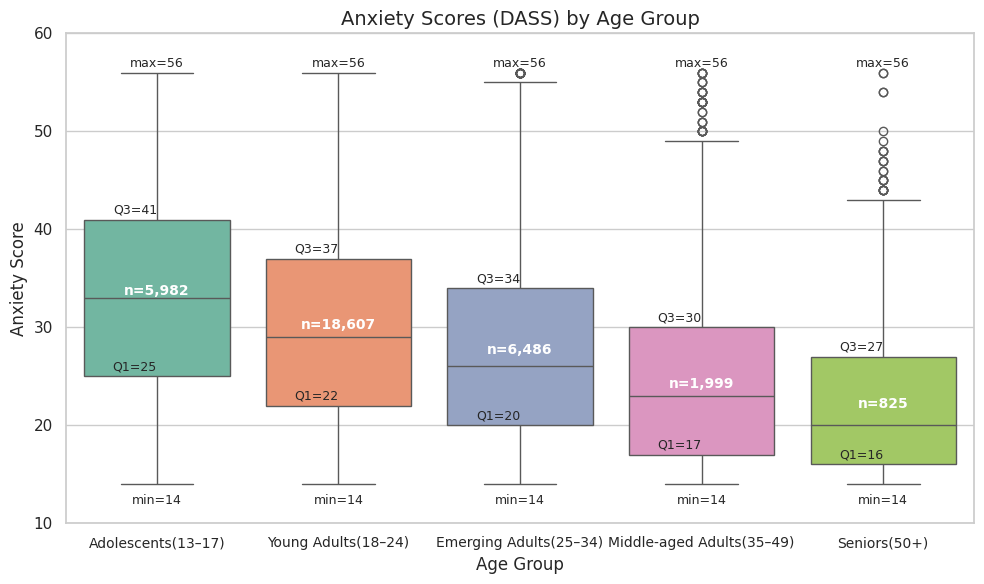

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="age_group",
    y="dassanxiety",
    data=analysis_standardized_df,
    hue="age_group",          #identical to x
    palette="Set2",
    showmeans=False,
    legend=False              #avoid adding an automatic legend

)
ax.set_ylim(10, 60)

#add annotations
age_counts = analysis_standardized_df["age_group"].value_counts()
for i, group in enumerate(labels):
    group_scores = analysis_standardized_df[analysis_standardized_df["age_group"] == group]["dassanxiety"]
    min_val = group_scores.min()
    q1 = group_scores.quantile(0.25)
    q3 = group_scores.quantile(0.75)
    max_val = group_scores.max()
    count = age_counts[group]

    ax.text(i, min_val - 1, f"min={min_val:.0f}", ha='center', va='top', fontsize=9)
    ax.text(i, q1 + 0.3, f"Q1={q1:.0f}", ha='right', va='bottom', fontsize=9)
    ax.text(i, q3 + 0.3, f"Q3={q3:.0f}", ha='right', va='bottom', fontsize=9)
    ax.text(i, max_val + 0.3, f"max={max_val:.0f}", ha='center', va='bottom', fontsize=9)
    ax.text(i, (q1 + q3) / 2, f"n={count:,}", ha='center', va='bottom', fontsize=10, weight='bold', color='white')

ax.set_title("Anxiety Scores (DASS) by Age Group", fontsize=14)
ax.set_xlabel("Age Group", fontsize=12)
ax.set_ylabel("Anxiety Score", fontsize=12)
ax.tick_params(axis='x', labelsize=10)  #size of labels x
plt.tight_layout()
plt.show()


orientation group

In [205]:


pd.set_option('display.max_rows', 100)


print("orientation distribution:")
print(analysis_standardized_df["orientation_clean"].value_counts().sort_index())


orientation distribution:
orientation_clean
Asexual          1692
Bisexual         4055
Heterosexual    20756
Homosexual       1592
No response      2785
Other            3019
Name: count, dtype: int64


In [206]:
import pandas as pd


orientation_filtered_df = analysis_standardized_df[~analysis_standardized_df["orientation_clean"].isin(["No response"])].copy()
#future worning
if isinstance(orientation_filtered_df["orientation_clean"].dtype, pd.CategoricalDtype):
    orientation_filtered_df["orientation_clean"] = orientation_filtered_df["orientation_clean"].cat.remove_unused_categories()


mean_std_by_orientation = orientation_filtered_df.groupby("orientation_clean", observed=True)["dassanxiety"].agg(['mean', 'std', 'count']).round(2)
display(mean_std_by_orientation)


,mean,std,count
orientation_clean,,,
Asexual,31.11,10.43,1692
Bisexual,32.21,10.31,4055
Heterosexual,28.76,9.81,20756
Homosexual,30.71,10.11,1592
Other,32.01,10.48,3019


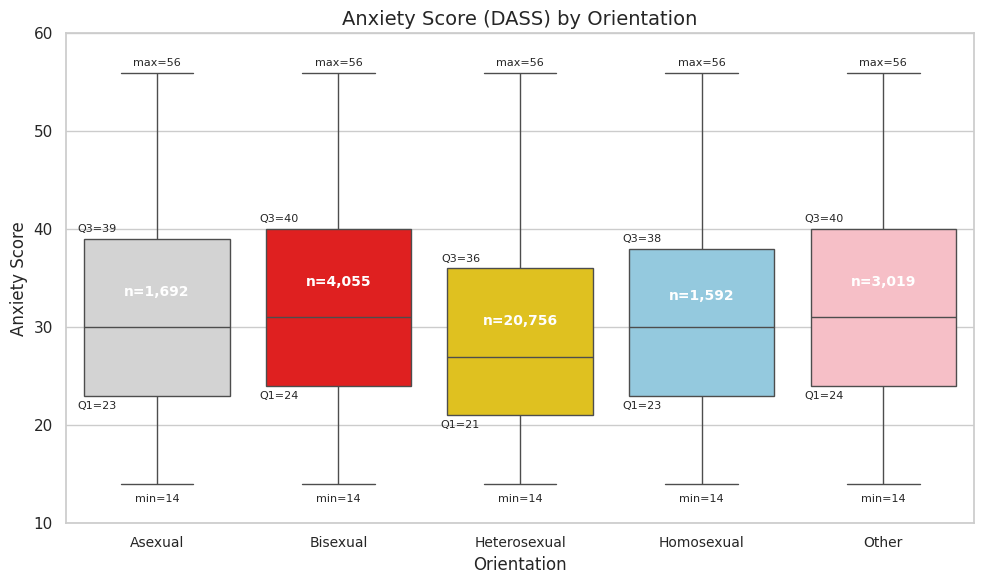

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

#palette
remaining_orientations = orientation_filtered_df["orientation_clean"].unique()
palette = {orientation: color for orientation, color in zip(
    remaining_orientations, ["gold", "skyblue", "lightpink", "red", "lightgray"]
)}

group_counts = orientation_filtered_df["orientation_clean"].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="orientation_clean",
    y="dassanxiety",
    data=orientation_filtered_df,
    palette=palette,
    hue="orientation_clean",
    legend=False,
    showmeans=False
)

ax.set_ylim(10, 60)
ax.tick_params(axis='x', labelsize=10)

#obtaining the actual x positions used by seaborn
positions = {cat.get_text(): i for i, cat in enumerate(ax.get_xticklabels())}

#add annotations
for orientation in remaining_orientations:
    scores = orientation_filtered_df[orientation_filtered_df["orientation_clean"] == orientation]["dassanxiety"]
    min_val = scores.min()
    q1 = scores.quantile(0.25)
    median = scores.median()
    q3 = scores.quantile(0.75)
    max_val = scores.max()
    count = group_counts[orientation]
    x = positions[orientation]


    ax.text(x, min_val - 1, f"min={min_val:.0f}", ha='center', va='top', fontsize=8)
    ax.text(x, max_val + 0.5, f"max={max_val:.0f}", ha='center', va='bottom', fontsize=8)

    ax.text(x - 0.22, q1 - 0.5, f"Q1={q1:.0f}", ha='right', va='top', fontsize=8)


    ax.text(x - 0.22, q3 + 0.5, f"Q3={q3:.0f}", ha='right', va='bottom', fontsize=8)


    n_y = median + (q3 - median) * 0.4
    ax.text(x, n_y, f"n={count:,}", ha='center', va='center',
            fontsize=10, weight='bold', color='white')


ax.set_title("Anxiety Score (DASS) by Orientation", fontsize=14)
ax.set_xlabel("Orientation", fontsize=12)
ax.set_ylabel("Anxiety Score", fontsize=12)

plt.tight_layout()
plt.show()


In [208]:
from scipy import stats

#annova
groups = [group["dassanxiety"].values for _, group in orientation_filtered_df.groupby("orientation_clean", observed=True)]
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA test results: F = {f_stat:.2f}, p = {p_val:.4f}")


ANOVA test results: F = 162.45, p = 0.0000


/tmp/ipython-input-3644374636.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_anxiety_by_country = analysis_standardized_df.groupby("country_name")["dassanxiety"].mean().reset_index()


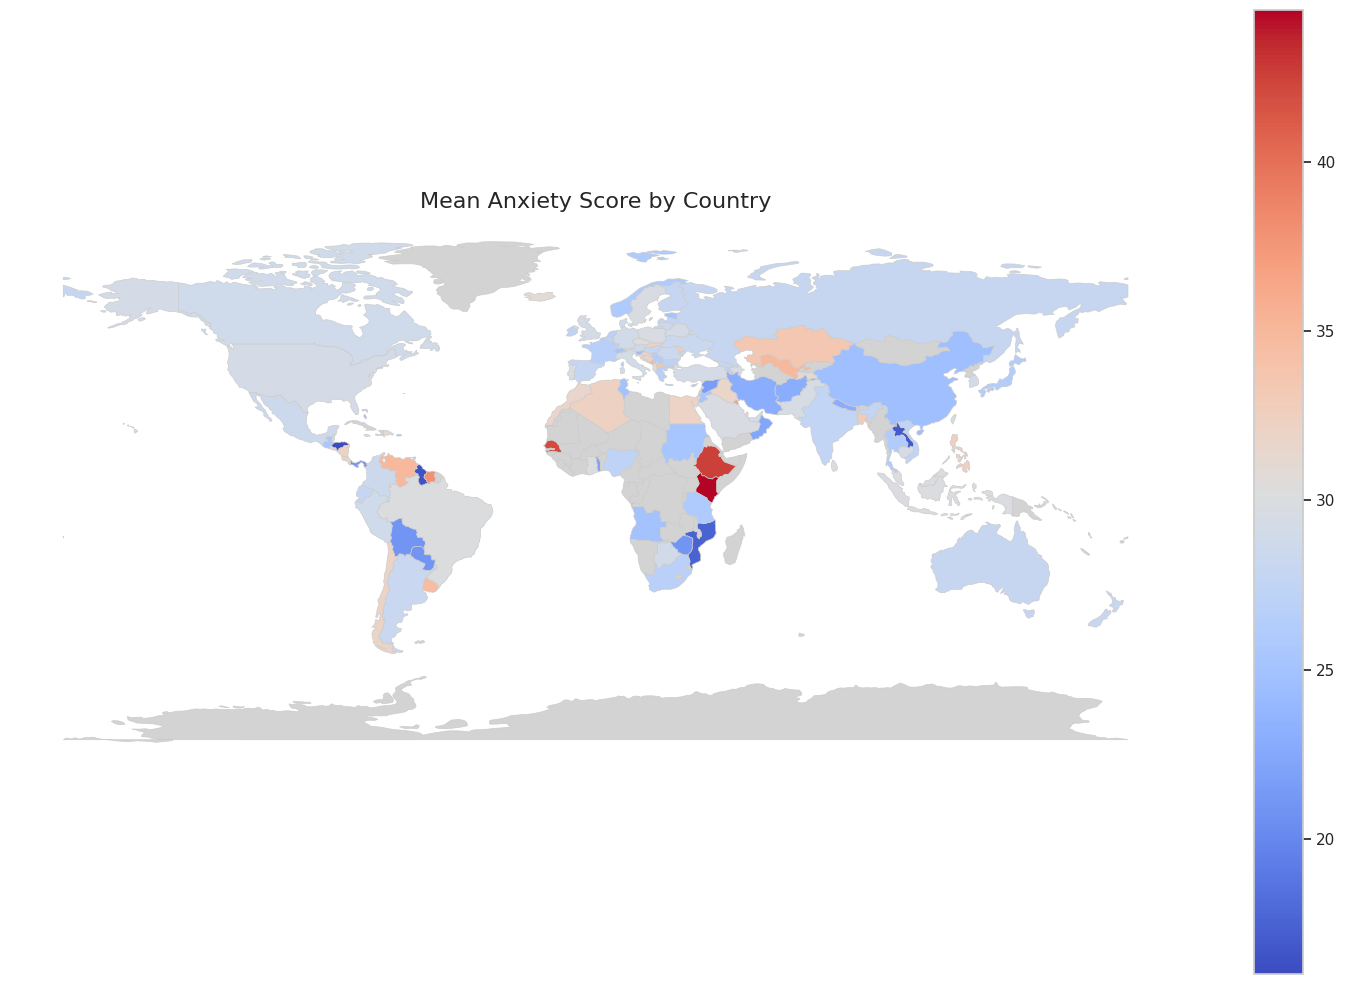

In [219]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import pycountry

mean_anxiety_by_country = analysis_standardized_df.groupby("country_name")["dassanxiety"].mean().reset_index()
mean_anxiety_by_country.columns = ["country_name", "mean_anxiety"]


def get_iso_alpha_3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

mean_anxiety_by_country["iso_alpha_3"] = mean_anxiety_by_country["country_name"].apply(get_iso_alpha_3)


url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
world = gpd.read_file(url)


world["iso_a3"] = world["id"]
merged = world.merge(mean_anxiety_by_country, how="left", left_on="iso_a3", right_on="iso_alpha_3")


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(
    column="mean_anxiety",
    cmap="coolwarm",
    linewidth=0.5,
    ax=ax,
    edgecolor="0.8",
    legend=True,
    missing_kwds={"color": "lightgrey", "label": "No data"}
)

ax.set_title("Mean Anxiety Score by Country", fontsize=16)
ax.axis("off")
plt.tight_layout()
plt.show()


In [210]:
# Top 10
top_countries = mean_anxiety_by_country.sort_values("mean_anxiety", ascending=False).head(10)
print("Top 10 scores :")
print(top_countries)



Top 10 scores :
      country_name  mean_anxiety iso_alpha_3
46            Guam     49.000000         GUM
67           Kenya     44.500000         KEN
38        Ethiopia     42.500000         ETH
107        Senegal     42.000000         SEN
59     Isle of Man     41.000000         IMN
117       Suriname     38.000000         SUR
69          Kuwait     37.285714         KWT
39   Faroe Islands     36.000000         FRO
77        Maldives     36.000000         MDV
82      Montenegro     35.333333         MNE


In [211]:
global_mean = mean_anxiety_by_country["mean_anxiety"].mean()
print(f"Moyenne globale des scores d’anxiété : {global_mean:.2f}")


Moyenne globale des scores d’anxiété : 28.76


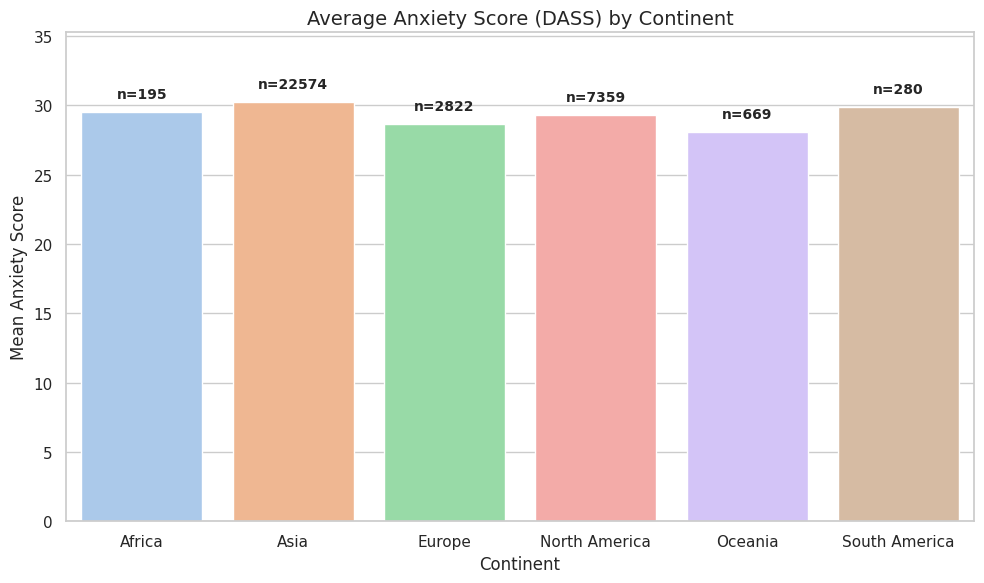

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns


continent_stats = (
    analysis_standardized_df
    .groupby("continent", observed=True)["dassanxiety"]
    .agg(["mean", "count"])
    .reset_index()
    .sort_values("mean", ascending=False)
)


plt.figure(figsize=(10, 6))
barplot = sns.barplot(

    x="continent", y="mean", hue="continent", data=continent_stats, palette="pastel", legend=False
)


for i, row in continent_stats.iterrows():
    barplot.text(
        i,
        row["mean"] + 0.8,
        f"n={int(row['count'])}",
        ha='center',
        va='bottom',
        fontsize=10,
        weight='bold'
    )


plt.title("Average Anxiety Score (DASS) by Continent", fontsize=14)
plt.xlabel("Continent", fontsize=12)
plt.ylabel("Mean Anxiety Score", fontsize=12)
plt.ylim(0, continent_stats["mean"].max() + 5)
plt.tight_layout()
plt.show()


In [218]:


analysis_standardized_df.groupby("continent", observed=True)["dassanxiety"].mean().sort_values(ascending=False)


,dassanxiety
continent,
Asia,30.256490
South America,29.860714
Africa,29.517949
North America,29.270010
Europe,28.659816
Oceania,28.034380
